# Notebook 03 — Treinamento de Modelos
Modelos treinados neste notebook:
- RandomForest (baseline)
- GradientBoosting
- LightGBM (caso indisponível, usa HistGradientBoost)
- MLPRegressor (Rede Neural)
- Comparação + Hiperparâmetros + Early Stopping

In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import mean_absolute_error, r2_score
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor, HistGradientBoostingRegressor, RandomForestClassifier
from sklearn.neural_network import MLPRegressor
import joblib
import warnings
warnings.filterwarnings('ignore')

# Carregar dataset
DATA_CSV_PATH = 'brasileirao_featured.csv'
df = pd.read_csv(DATA_CSV_PATH)
df.head()



,season,place,team,points,played,won,draw,loss,goals,goals_taken,goals_diff,aproveitamento,media_gols_marcados,media_gols_sofridos
0,2003,1,Cruzeiro,100,46,31,7,8,102,47,55,217.391304,1.021739,1.195652
1,2003,2,Santos,87,46,25,12,9,93,60,33,189.130435,1.304348,0.717391
2,2003,3,São Paulo,78,46,22,12,12,81,67,14,169.565217,1.456522,0.304348
3,2003,4,São Caetano,74,46,19,14,13,53,37,16,160.869565,0.804348,0.347826
4,2003,5,Coritiba,73,46,21,10,15,67,58,9,158.695652,1.260870,0.195652


In [6]:
# Seleção de features
features = ['points','won','draw','loss','goals','goals_taken','goals_diff','played']
X = df[features]
y = df['place']  # Target

In [7]:
# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [8]:
# Treinar modelo
model = RandomForestClassifier()
model.fit(X_train, y_train)

,n_estimators,100
,criterion,'gini'
,max_depth,None
,min_samples_split,2
,min_samples_leaf,1
,min_weight_fraction_leaf,0.0
,max_features,'sqrt'
,max_leaf_nodes,None
,min_impurity_decrease,0.0
,bootstrap,True
,oob_score,False


In [9]:
# Treinar modelo
model = RandomForestRegressor()
model.fit(X_train, y_train)

,n_estimators,100
,criterion,'squared_error'
,max_depth,None
,min_samples_split,2
,min_samples_leaf,1
,min_weight_fraction_leaf,0.0
,max_features,1.0
,max_leaf_nodes,None
,min_impurity_decrease,0.0
,bootstrap,True
,oob_score,False


In [10]:
# Modelo 1: RandomForest (baseline)
rf = RandomForestRegressor()
rf.fit(X_train, y_train)
rf_pred = rf.predict(X_test)
print('RandomForest MAE:', mean_absolute_error(y_test, rf_pred))
print('RandomForest R²:', r2_score(y_test, rf_pred))

RandomForest MAE: 0.8593407407407405
RandomForest R²: 0.9631733589414022


In [11]:
# Modelo 2: Gradient Boosting (Comparação)
gb = GradientBoostingRegressor()
gb.fit(X_train, y_train)
gb_pred = gb.predict(X_test)
print('GB MAE:', mean_absolute_error(y_test, gb_pred))
print('GB R²:', r2_score(y_test, gb_pred))

GB MAE: 0.9210187494937598
GB R²: 0.9569499589339397


In [12]:
# Modelo 3: LightGBM-like (HistGradientBoost, com early stopping)
hgb = HistGradientBoostingRegressor(early_stopping=True)
hgb.fit(X_train, y_train)
hgb_pred = hgb.predict(X_test)
print('HistGB MAE:', mean_absolute_error(y_test, hgb_pred))
print('HistGB R²:', r2_score(y_test, hgb_pred))

HistGB MAE: 0.960577408886119
HistGB R²: 0.9550634720028259


In [13]:
# Modelo 4: Rede Neural (MLP)
mlp = MLPRegressor(max_iter=2000, early_stopping=True)
mlp.fit(X_train, y_train)
mlp_pred = mlp.predict(X_test)
print('MLP MAE:', mean_absolute_error(y_test, mlp_pred))
print('MLP R²:', r2_score(y_test, mlp_pred))

MLP MAE: 0.9748767705743416
MLP R²: 0.9550745917554893


In [14]:
# Hiperparâmetros no RandomForest
grid = {'n_estimators':[100,200],'max_depth':[None,10,20]}
grid_search = GridSearchCV(RandomForestRegressor(), grid, cv=3)
grid_search.fit(X_train, y_train)
best = grid_search.best_estimator_
gs_pred = best.predict(X_test)
print('RF Tunado MAE:', mean_absolute_error(y_test, gs_pred))

RF Tunado MAE: 0.8720547619047618


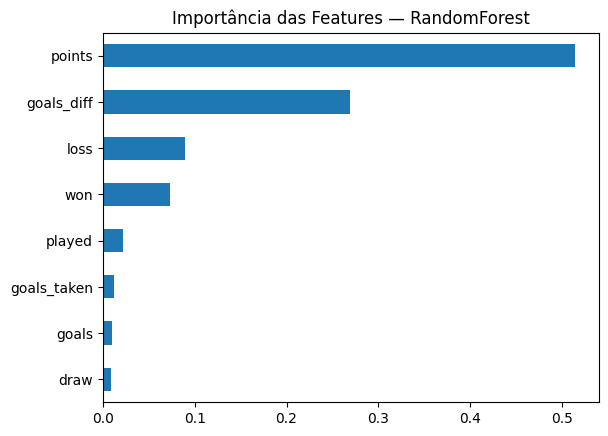

In [15]:
# Importância das Features
importances = pd.Series(rf.feature_importances_, index=features)
importances.sort_values().plot(kind='barh')
plt.title('Importância das Features — RandomForest')
plt.show()

In [16]:
# Salvar modelo
joblib.dump(model, "model_rf.pkl")

print("✅ Modelo salvo como model_rf.pkl!")

✅ Modelo salvo como model_rf.pkl!
